In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# Set up the csv file as a DataFrame
#df = pd.read_csv('sp_list.csv')

# Open the excel file as an object
xlsfile = pd.ExcelFile('sharepoint_list_data.xlsx')

# Parse data from Sheet1
df1 = xlsfile.parse('Sheet1')

In [30]:
# Disaply DataFrame
df1

,ID,Title,Categories
0,1,Record 1,;#A
1,2,Record 2,;#A;#B;#C
2,3,Record 3,;#B;#C
3,4,Reocrd 4,;#A;#B
4,5,Record 5,;#A;#C


In [32]:
s = df1['Categories'].str.split(';#').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = "Categories"
s.drop()
s

TypeError: drop() missing 1 required positional argument: 'labels'

In [25]:
del df1['Categories']
df2 = df1.join(s)

df2

,ID,Title,Categories
0,1,Record 1,
0,1,Record 1,A
1,2,Record 2,
1,2,Record 2,A
1,2,Record 2,B
1,2,Record 2,C
2,3,Record 3,
2,3,Record 3,B
2,3,Record 3,C
3,4,Reocrd 4,


In [14]:
# filter out Cats = empty
# ignore index
df4 = df3[df3.Categories != '']


In [13]:
df4

NameError: name 'df4' is not defined

In [34]:
df4 = df3[df3.Categories != '']
df4

,Title,Categories
0,Record 1,A
1,Record 2,A
1,Record 2,B
1,Record 2,C
2,Record 3,B
2,Record 3,C
3,Reocrd 4,A
3,Reocrd 4,B
4,Record 5,A
4,Record 5,C


In [135]:
df4['Cats']

0    A
1    A
1    B
1    C
2    B
2    C
3    A
3    B
4    A
4    C
Name: Cats, dtype: object

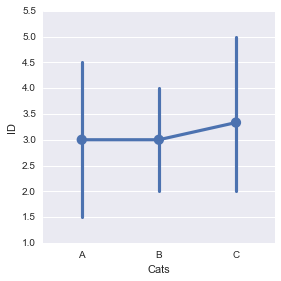

In [144]:
sns.factorplot(x='Cats', y='ID', data=df4)

In [153]:
df5 = df4.groupby('Cats')

In [158]:
df5.describe()

ID
Cats                
A    count  4.000000
     mean   3.000000
     std    1.825742
     min    1.000000
     25%    1.750000
     50%    3.000000
     75%    4.250000
     max    5.000000
B    count  3.000000
     mean   3.000000
     std    1.000000
     min    2.000000
     25%    2.500000
     50%    3.000000
     75%    3.500000
     max    4.000000
C    count  3.000000
     mean   3.333333
     std    1.527525
     min    2.000000
     25%    2.500000
     50%    3.000000
     75%    4.000000
     max    5.000000

In [151]:
df4.pivot_table(index=['Cats'])

,ID
Cats,
A,3.000000
B,3.000000
C,3.333333


In [161]:
df5.count()

,ID,Title
Cats,,
A,4,4
B,3,3
C,3,3


Cats
A    Axes(0.125,0.125;0.775x0.775)
B    Axes(0.125,0.125;0.775x0.775)
C    Axes(0.125,0.125;0.775x0.775)
dtype: object

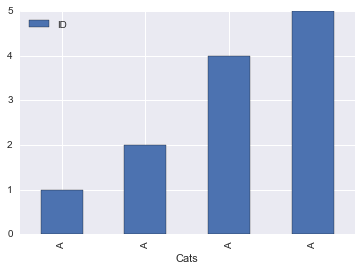

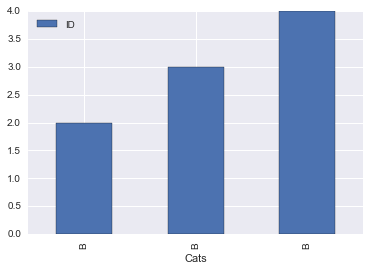

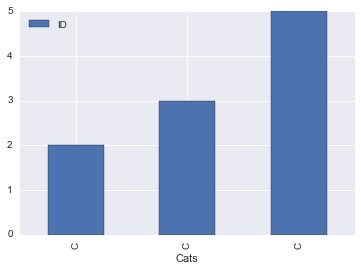

In [162]:
df5.plot(kind='bar', x='Cats', y='ID')